# **Lineer Regreson**
## **Hastane Masrafı**

## Import & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("medical_cost.csv")

1. age: age of primary beneficiary
2. sex: insurance contractor gender, female, male
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
3. children: Number of children covered by health insurance / Number of dependents
4. smoker: Smoking
5. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
6. charges: Individual medical costs billed by health insurance


https://www.kaggle.com/datasets/mirichoi0218/insurance

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


---
## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


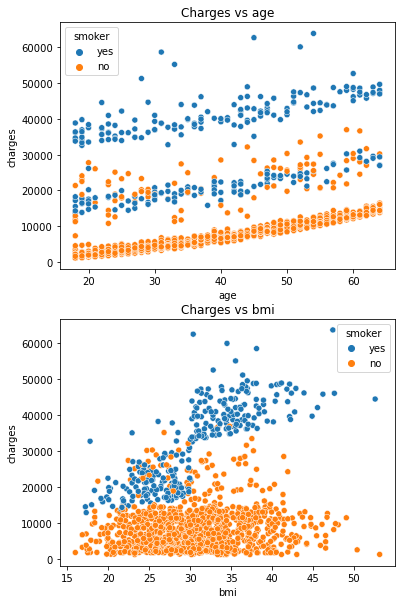

In [7]:
fig = plt.figure(figsize=(6,10))
ax = fig.add_subplot(211)
sns.scatterplot(x='age',y='charges',data=df,hue='smoker')
ax.set_title('Charges vs age')

ax = fig.add_subplot(212)
sns.scatterplot(x='bmi',y='charges',data=df,hue='smoker')
ax.set_title('Charges vs bmi');

<AxesSubplot:xlabel='bmi', ylabel='charges'>

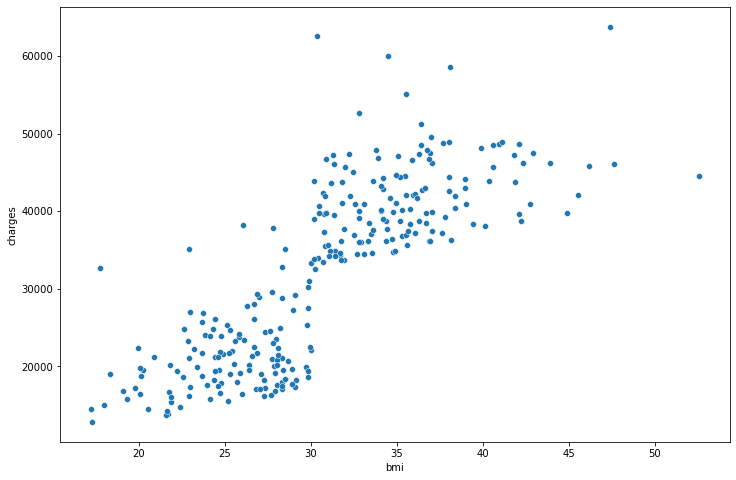

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="bmi", y="charges", data=df[df["smoker"] == "yes"])

<AxesSubplot:xlabel='sex', ylabel='charges'>

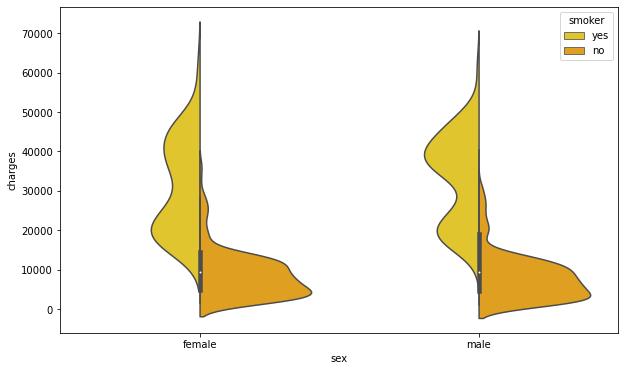

In [9]:
plt.figure(figsize=(10,6))
sns.violinplot(x="sex",y='charges',data=df, 
 hue="smoker", split=True, palette="Wistia")

<AxesSubplot:xlabel='region', ylabel='charges'>

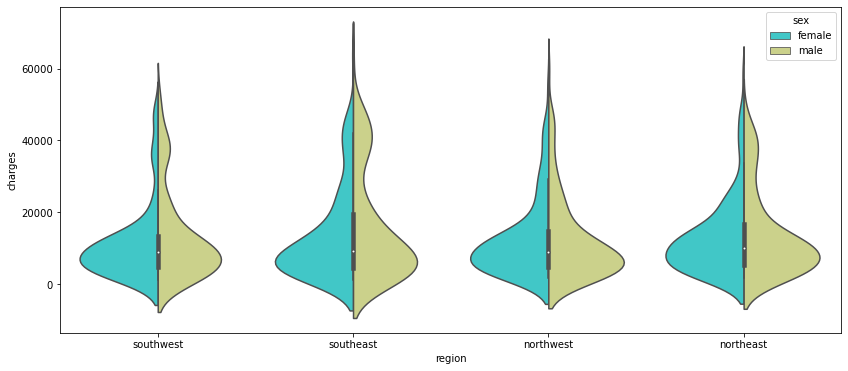

In [10]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='rainbow',split=True)

<AxesSubplot:xlabel='children', ylabel='charges'>

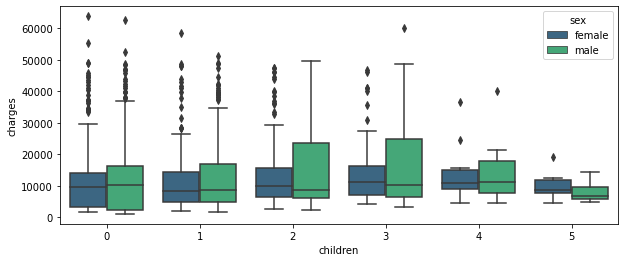

In [11]:
plt.figure(figsize=(10,4))
sns.boxplot(x="children", y="charges", data=df,
 hue="sex", palette="viridis")

In [12]:
df.groupby("children").aggregate(["min","max","mean"])["charges"]

C:\Users\mbatu\AppData\Local\Temp\ipykernel_16056\1524305016.py:1: FutureWarning: ['sex', 'smoker', 'region'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby("children").aggregate(["min","max","mean"])["charges"]


,min,max,mean
children,,,
0,1121.8739,63770.42801,12365.975602
1,1711.0268,58571.07448,12731.171832
2,2304.0022,49577.66240,15073.563734
3,3443.0640,60021.39897,15355.318367
4,4504.6624,40182.24600,13850.656311
5,4687.7970,19023.26000,8786.035247


<AxesSubplot:xlabel='charges', ylabel='smoker'>

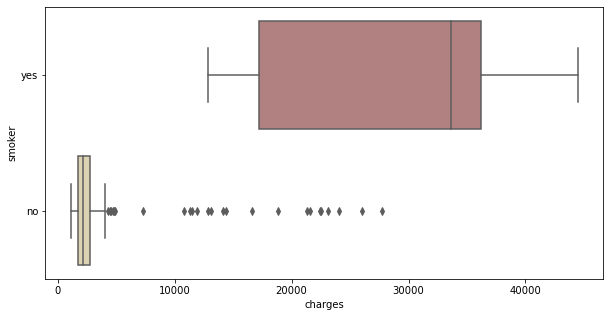

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(y="smoker", x="charges", data = df[(df.age < 24)] , orient="h", palette = 'pink')

In [14]:
mefta = df[(df.age < 24) & (df.smoker == "yes")]["charges"].mean()
naysü = df[(df.age < 24) & (df.smoker == "no")]["charges"].mean()
print("24 yaş altı sigara İÇEN ortalama hastane masrafı:   ", round(mefta))
print("24 yaş altı sigara İÇMEYEN ortalama hastane masrafı:", round(naysü))

24 yaş altı sigara İÇEN ortalama hastane masrafı:    27640
24 yaş altı sigara İÇMEYEN ortalama hastane masrafı: 3645


In [15]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


---
## Dummy

In [16]:
df = pd.get_dummies(data=df, drop_first=True)

In [17]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [18]:
df.columns[:6]

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [19]:
df[['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes']].corr()

,age,bmi,children,charges,sex_male,smoker_yes
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000


<AxesSubplot:>

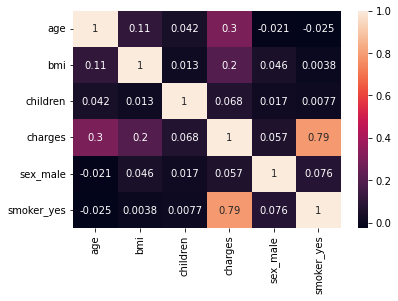

In [20]:
sns.heatmap(df[['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes']].corr(), annot=True)

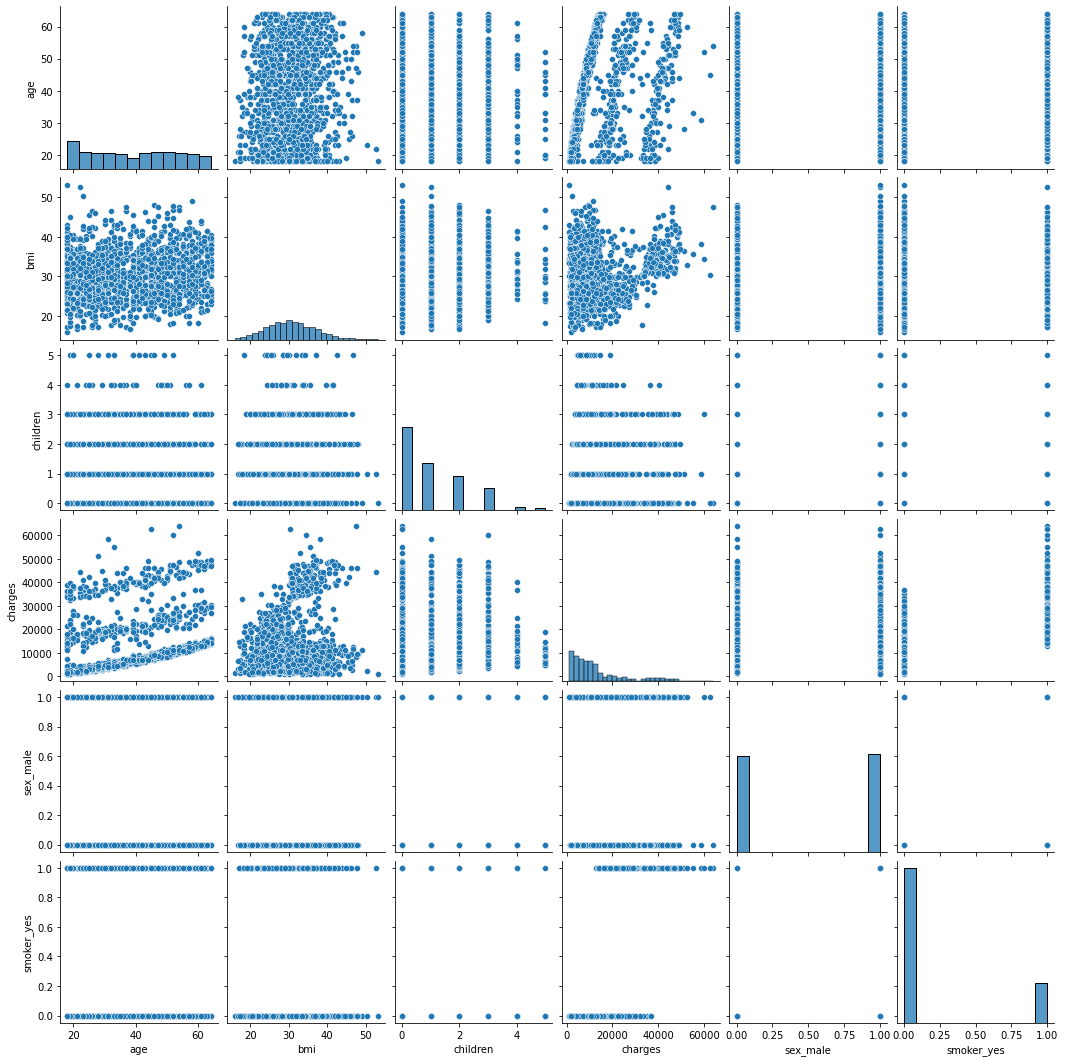

In [42]:
sns.pairplot(df[['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes']])

---
## Train Test Split

In [21]:
X = df.drop("charges", axis=1)
y = df["charges"]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=9)

---
## Regresyon Model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [26]:
charge_pred = regr.predict(X_test)

---
## Performans

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
print("MAE : ", round(mean_absolute_error(y_test,charge_pred),2))
print("RMSE :", round(np.sqrt(mean_squared_error(y_test,charge_pred)),2))

MAE :  3734.06
RMSE : 5726.89


In [29]:
print(df["charges"].mean())
print(df["charges"].std())

13270.422265141257
12110.011236693994


---
## Final

In [30]:
final = LinearRegression()
final.fit(X,y)

LinearRegression()

In [31]:
y_hat = final.predict(X)

In [32]:
final.coef_

array([  256.85635254,   339.19345361,   475.50054515,  -131.3143594 ,
       23848.53454191,  -352.96389942, -1035.02204939,  -960.0509913 ])

In [33]:
coef_df = pd.DataFrame(final.coef_, X.columns,columns=["Katsayı"])
coef_df

,Katsayı
age,256.856353
bmi,339.193454
children,475.500545
sex_male,-131.314359
smoker_yes,23848.534542
region_northwest,-352.963899
region_southeast,-1035.022049
region_southwest,-960.050991


In [34]:
df.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
hasta = [[39,25,1,0,0,1,0,0]]

In [36]:
final.predict(hasta)

c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6681.23215878])

---
## Residuals

In [38]:
res = y_hat - y

<AxesSubplot:xlabel='charges', ylabel='charges'>

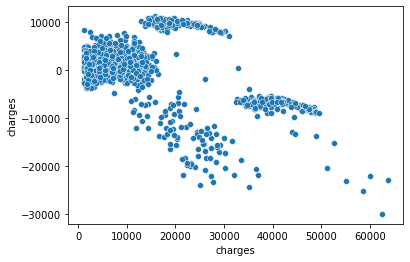

In [39]:
sns.scatterplot(x=y, y=res)

# **https://www.youtube.com/watch?v=ESoYS9SZW-4**